# K-means Clustering with PCA

In [1]:
import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
crime = pd.read_csv('US_Crime.csv')
crime.head()

,LANDAREA,POPU1985,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO,REG,DIV
0,33265,1164,1.5,7.0,12.6,62,562,1055,146,1,1
1,9279,998,2.0,6.0,12.1,36,566,929,172,1,1
2,9614,535,1.3,10.3,7.6,55,731,969,124,1,1
3,8284,5822,3.5,12.0,99.5,88,1134,1531,878,1,1
4,1212,968,3.2,3.6,78.3,120,1019,2186,859,1,1


In [2]:
crime['REG'].value_counts().sort_index()

1     9
2    12
3    16
4    13
Name: REG, dtype: int64

In [3]:
for name in crime.columns[:9]:
    crime[name] = crime[name].astype('float64')
    
for name in crime.columns[9:]:
    crime[name] = crime[name].astype('category')
    
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
LANDAREA    50 non-null float64
POPU1985    50 non-null float64
MURD        50 non-null float64
RAPE        50 non-null float64
ROB         50 non-null float64
ASSA        50 non-null float64
BURG        50 non-null float64
LARC        50 non-null float64
AUTO        50 non-null float64
REG         50 non-null category
DIV         50 non-null category
dtypes: category(2), float64(9)
memory usage: 4.3 KB


In [4]:
df = crime.loc[:,'MURD':'AUTO'].copy()

In [5]:
df.head()

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,1.5,7.0,12.6,62.0,562.0,1055.0,146.0
1,2.0,6.0,12.1,36.0,566.0,929.0,172.0
2,1.3,10.3,7.6,55.0,731.0,969.0,124.0
3,3.5,12.0,99.5,88.0,1134.0,1531.0,878.0
4,3.2,3.6,78.3,120.0,1019.0,2186.0,859.0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
df_scaled = scaler.transform(df)

In [10]:
pd.DataFrame(df_scaled, columns = df.columns).describe().loc[['mean', 'std']]

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
mean,-2.020606e-16,-1.265654e-16,-5.662137e-17,1.820766e-16,1.154632e-16,-1.554312e-16,-6.661338e-17
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00


In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA()

In [13]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
x_pca = pca.transform(df_scaled)

In [15]:
pd.DataFrame(np.round(pca.components_,2), columns = df.columns)

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,0.28,0.42,0.39,0.39,0.44,0.36,0.35
1,0.64,0.12,-0.05,0.46,-0.26,-0.40,-0.37
2,-0.01,-0.36,0.60,0.01,-0.16,-0.51,0.47
3,0.33,-0.30,-0.65,0.07,0.14,-0.05,0.60
4,-0.20,0.76,-0.19,-0.14,-0.29,-0.36,0.34
5,-0.10,0.07,-0.07,-0.10,0.78,-0.56,-0.21
6,-0.59,-0.11,-0.16,0.78,-0.03,-0.07,0.01


In [16]:
lambdas = pca.explained_variance_ratio_
var = 0
j = 0
for i in lambdas:
    var += i 
    percent = format(var * 100, '.2f')
    j += 1
    print('{} 번째 PC까지 사용했을 때 설명되는 분산의 비율: {}%'.format(j, percent)) 

1 번째 PC까지 사용했을 때 설명되는 분산의 비율: 58.24%
2 번째 PC까지 사용했을 때 설명되는 분산의 비율: 78.69%
3 번째 PC까지 사용했을 때 설명되는 분산의 비율: 87.71%
4 번째 PC까지 사용했을 때 설명되는 분산의 비율: 92.57%
5 번째 PC까지 사용했을 때 설명되는 분산의 비율: 96.12%
6 번째 PC까지 사용했을 때 설명되는 분산의 비율: 98.11%
7 번째 PC까지 사용했을 때 설명되는 분산의 비율: 100.00%


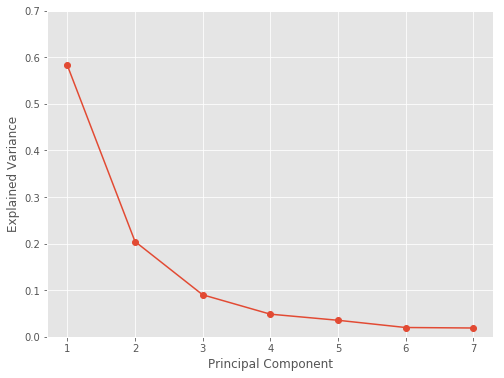

In [17]:
plt.figure(figsize = (8,6))
plt.style.use('ggplot')
plt.plot(range(1,8), lambdas, marker = 'o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.ylim((0, .7))
plt.xticks([1,2,3,4,5,6,7])
plt.show()

PC3까지 쓰기로 결정

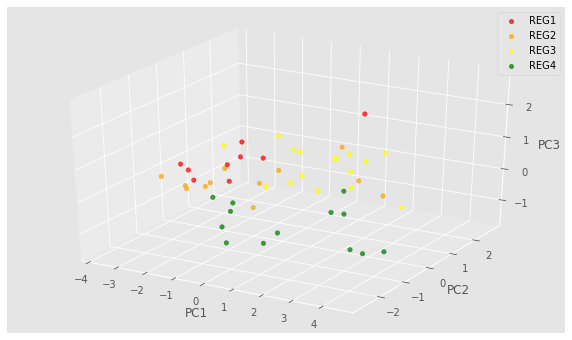

In [18]:
index1 = crime[crime['REG'] == 1].index.values
index2 = crime[crime['REG'] == 2].index.values
index3 = crime[crime['REG'] == 3].index.values
index4 = crime[crime['REG'] == 4].index.values
index = [index1, index2, index3, index4]

from mpl_toolkits.mplot3d import Axes3D

# initialize figure and 3d projection for the PC3 data
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')

color_list = ['red', 'orange', 'yellow', 'green']

for i,j in enumerate(index):
    xs = x_pca.T[0][j]
    ys = x_pca.T[1][j]
    zs = x_pca.T[2][j]
    plot = ax.scatter(xs, ys, zs, alpha = 0.75, c = color_list[i], depthshade = True, label = 'REG' + str(i+1))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()

plt.show()

In [19]:
import matplotlib.pylab as pl
from sklearn.cluster import KMeans

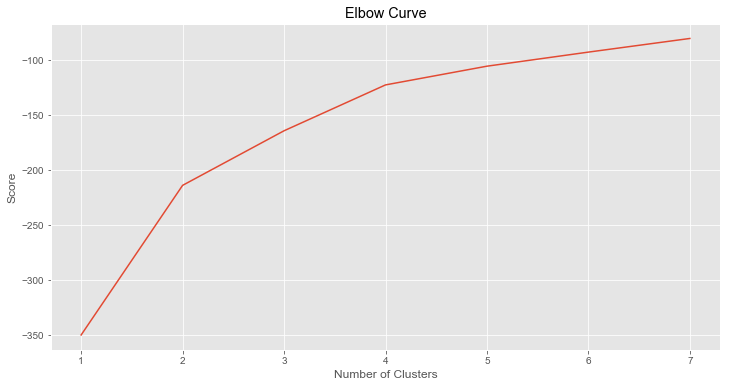

In [20]:
number_clusters = range(1, 8)
kmeans_list = []

for i in number_clusters:
    kmeans_list.append(KMeans(n_clusters=i))
scores = []
for i in range(len(kmeans_list)):
    scores.append(kmeans_list[i].fit(df_scaled).score(df_scaled))
    
pl.figure(figsize = (12, 6))
pl.plot(number_clusters,scores)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.style.use('seaborn')
pl.show()

In [21]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    kmeans = KMeans(n_clusters=k, max_iter=300)
    cluster = kmeans.fit_predict(df_scaled) 
    print(k, format(silhouette_score(df_scaled, cluster), '.2f'))

2 0.33
3 0.26
4 0.31
5 0.29
6 0.29
7 0.31


optimal K: 4개로 결정

In [22]:
np.random.seed(0)
kmeans = KMeans(n_clusters=4, max_iter=300, verbose=0)

In [23]:
clusters = kmeans.fit_predict(df_scaled)
print(clusters.shape)
print(x_pca.shape)

(50,)
(50, 7)


In [24]:
x_pca_knn = pd.DataFrame(np.round(x_pca,2), columns = df.columns)

In [25]:
x_pca_knn['CLUSTER'] = pd.Series(clusters, name = 'CLUSTER')
x_pca_knn.head()

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO,CLUSTER
0,-2.99,-0.31,0.11,-0.31,0.10,0.38,0.37,2
1,-3.18,-0.40,0.30,-0.16,0.13,0.47,0.02,2
2,-2.76,-0.37,-0.16,-0.43,0.35,0.89,0.27,2
3,0.22,-1.80,1.59,1.49,0.82,0.37,0.09,0
4,-0.04,-2.02,1.41,1.84,-0.34,-0.49,0.61,0


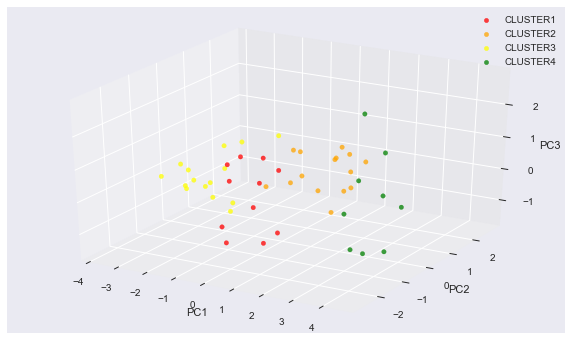

In [26]:
# initialize figure and 3d projection for the PC3 data
index1 = x_pca_knn[x_pca_knn['CLUSTER'] == 0].index.values
index2 = x_pca_knn[x_pca_knn['CLUSTER'] == 1].index.values
index3 = x_pca_knn[x_pca_knn['CLUSTER'] == 2].index.values
index4 = x_pca_knn[x_pca_knn['CLUSTER'] == 3].index.values

index = [index1, index2, index3, index4]

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')

for i,j in enumerate(index):
    xs = x_pca.T[0][j]
    ys = x_pca.T[1][j]
    zs = x_pca.T[2][j]
    plot = ax.scatter(xs, ys, zs, alpha = 0.75, c = color_list[i], depthshade = True, label = 'CLUSTER' + str(i+1))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.legend()

plt.show()

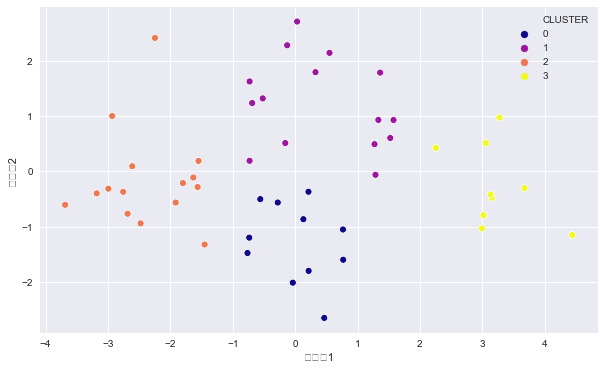

In [27]:
index1 = x_pca_knn[x_pca_knn['CLUSTER'] == 0].index.values
index2 = x_pca_knn[x_pca_knn['CLUSTER'] == 1].index.values
index3 = x_pca_knn[x_pca_knn['CLUSTER'] == 2].index.values
index4 = x_pca_knn[x_pca_knn['CLUSTER'] == 3].index.values
index = [index1, index2, index3, index4]

color_list = ['red', 'orange', 'yellow', 'green']

plt.figure(figsize = (10, 6))

sns.scatterplot(x_pca.T[0], x_pca.T[1], data = x_pca_knn, hue = 'CLUSTER', palette = 'plasma')
        
plt.xlabel('주성분1')
plt.ylabel('주성분2')
plt.show()
    

In [28]:
pd.DataFrame(np.round(pca.components_[:2],2), columns = df.columns)

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO
0,0.28,0.42,0.39,0.39,0.44,0.36,0.35
1,0.64,0.12,-0.05,0.46,-0.26,-0.40,-0.37


In [29]:
x_pca_knn['REG'] = crime['REG']
x_pca_knn.head()

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO,CLUSTER,REG
0,-2.99,-0.31,0.11,-0.31,0.10,0.38,0.37,2,1
1,-3.18,-0.40,0.30,-0.16,0.13,0.47,0.02,2,1
2,-2.76,-0.37,-0.16,-0.43,0.35,0.89,0.27,2,1
3,0.22,-1.80,1.59,1.49,0.82,0.37,0.09,0,1
4,-0.04,-2.02,1.41,1.84,-0.34,-0.49,0.61,0,1


In [30]:
cluster1 = x_pca_knn.groupby('CLUSTER').get_group(0).index.values
cluster2 = x_pca_knn.groupby('CLUSTER').get_group(1).index.values
cluster3 = x_pca_knn.groupby('CLUSTER').get_group(2).index.values
cluster4 = x_pca_knn.groupby('CLUSTER').get_group(3).index.values

살인+강간+ROB+ASSA 폭행군  
BURG+LARC+AUTO 절도군 

In [31]:
group1_cluster1 = df.iloc[cluster1,:].aggregate(sum)[0:2].sum()
group1_cluster2 = df.iloc[cluster1,:].aggregate(sum)[2:4].sum()
group1_cluster3 = df.iloc[cluster1,:].aggregate(sum)[4:].sum()
group2_cluster1 = df.iloc[cluster2,:].aggregate(sum)[0:2].sum()
group2_cluster2 = df.iloc[cluster2,:].aggregate(sum)[2:4].sum()
group2_cluster3 = df.iloc[cluster2,:].aggregate(sum)[4:].sum()
group3_cluster1 = df.iloc[cluster3,:].aggregate(sum)[0:2].sum()
group3_cluster2 = df.iloc[cluster3,:].aggregate(sum)[2:4].sum()
group3_cluster3 = df.iloc[cluster3,:].aggregate(sum)[4:].sum()
group4_cluster1 = df.iloc[cluster4,:].aggregate(sum)[0:2].sum()
group4_cluster2 = df.iloc[cluster4,:].aggregate(sum)[2:4].sum()
group4_cluster3 = df.iloc[cluster4,:].aggregate(sum)[4:].sum()

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_fname = 'C:/Windows/Fonts/H2GTRM.ttf'
font_family = fm.FontProperties(fname=font_fname).get_name()
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20
plt.rcParams["font.family"] = font_family

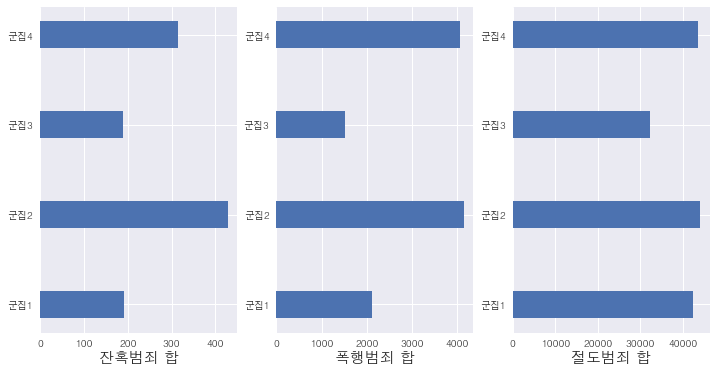

In [33]:
ypos = np.arange(4)
y_pos = ['군집1', '군집2', '군집3', '군집4']
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
fluctuations = [group1_cluster1, group2_cluster1, group3_cluster1, group4_cluster1]
rects = plt.barh(ypos, fluctuations, align='center', height=0.3)
plt.yticks(ypos, y_pos)
plt.xlabel('잔혹범죄 합', fontdict = {'fontsize':15})
plt.subplot(1,3,2)
fluctuations = [group1_cluster2, group2_cluster2, group3_cluster2, group4_cluster2]
rects = plt.barh(ypos, fluctuations, align='center', height=0.3)
plt.yticks(ypos, y_pos)
plt.xlabel('폭행범죄 합', fontdict = {'fontsize':15})
plt.subplot(1,3,3)
fluctuations = [group1_cluster3, group2_cluster3, group3_cluster3, group4_cluster3]
rects = plt.barh(ypos, fluctuations, align='center', height=0.3)
plt.yticks(ypos, y_pos)
plt.xlabel('절도범죄 합', fontdict = {'fontsize':15})
plt.show()

In [34]:
print(crime.iloc[cluster1,]['REG'].value_counts())
print(crime.iloc[cluster2,]['REG'].value_counts())
print(crime.iloc[cluster3,]['REG'].value_counts())
print(crime.iloc[cluster4,]['REG'].value_counts())

4    4
1    4
2    3
3    0
Name: REG, dtype: int64
3    12
4     2
2     1
1     0
Name: REG, dtype: int64
2    6
1    4
4    3
3    2
Name: REG, dtype: int64
4    4
3    2
2    2
1    1
Name: REG, dtype: int64


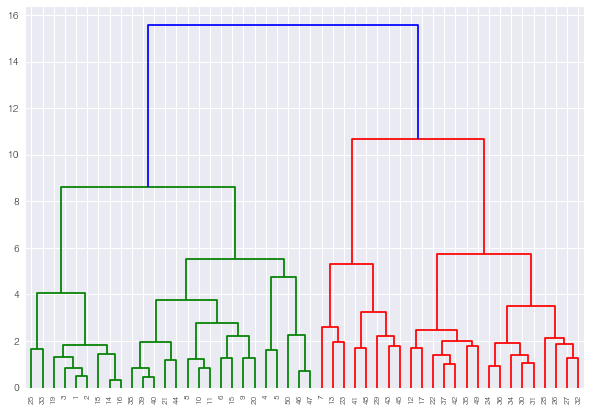

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

np.random.seed(0)
linked = linkage(df_scaled, 'ward')

labelList = range(1, 51)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [36]:
np.random.seed(0)
cluster_hier = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(df_scaled)

In [37]:
x_pca_knn['CLUSTER'] = pd.Series(cluster_hier.labels_, name = 'CLUSTER')
x_pca_knn.head()

,MURD,RAPE,ROB,ASSA,BURG,LARC,AUTO,CLUSTER,REG
0,-2.99,-0.31,0.11,-0.31,0.10,0.38,0.37,3,1
1,-3.18,-0.40,0.30,-0.16,0.13,0.47,0.02,3,1
2,-2.76,-0.37,-0.16,-0.43,0.35,0.89,0.27,3,1
3,0.22,-1.80,1.59,1.49,0.82,0.37,0.09,1,1
4,-0.04,-2.02,1.41,1.84,-0.34,-0.49,0.61,1,1


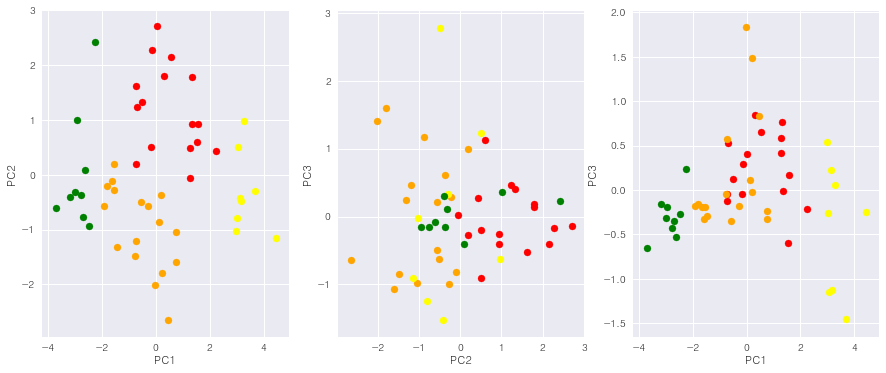

In [38]:
index1 = x_pca_knn[x_pca_knn['CLUSTER'] == 0].index.values
index2 = x_pca_knn[x_pca_knn['CLUSTER'] == 1].index.values
index3 = x_pca_knn[x_pca_knn['CLUSTER'] == 2].index.values
index4 = x_pca_knn[x_pca_knn['CLUSTER'] == 3].index.values
index = [index1, index2, index3, index4]

color_list = ['red', 'orange', 'yellow', 'green']

plt.figure(figsize = (15, 6))

for i in range(3):
    if i == 0:
        plt.subplot(1, 3, 1)
        for k, j in enumerate(index):
            xs = x_pca.T[0][j]
            ys = x_pca.T[1][j]
            plt.scatter(xs, ys, c = color_list[k], label = 'CLUSTER' + str(i+1))
        plt.xlabel('PC1')
        plt.ylabel('PC2')
    elif i == 1:
        plt.subplot(1, 3, 2)
        for k, j in enumerate(index):
            xs = x_pca.T[1][j]
            ys = x_pca.T[2][j]
            plt.scatter(xs, ys, c = color_list[k], label = 'CLUSTER' + str(i+1))
        plt.xlabel('PC2')
        plt.ylabel('PC3')
    if i == 2:
        plt.subplot(1, 3, 3)
        for k, j in enumerate(index):
            xs = x_pca.T[0][j]
            ys = x_pca.T[3][j]
            plt.scatter(xs, ys, c = color_list[k], label = 'CLUSTER' + str(i+1))
        plt.xlabel('PC1')
        plt.ylabel('PC3')

In [39]:

cluster1 = x_pca_knn.groupby('CLUSTER').get_group(0).index.values
cluster2 = x_pca_knn.groupby('CLUSTER').get_group(1).index.values
cluster3 = x_pca_knn.groupby('CLUSTER').get_group(2).index.values
cluster4 = x_pca_knn.groupby('CLUSTER').get_group(3).index.values

group1_cluster1 = df.iloc[cluster1,:].aggregate(sum)[0:2].sum()
group1_cluster2 = df.iloc[cluster1,:].aggregate(sum)[2:4].sum()
group1_cluster3 = df.iloc[cluster1,:].aggregate(sum)[4:].sum()
group2_cluster1 = df.iloc[cluster2,:].aggregate(sum)[0:2].sum()
group2_cluster2 = df.iloc[cluster2,:].aggregate(sum)[2:4].sum()
group2_cluster3 = df.iloc[cluster2,:].aggregate(sum)[4:].sum()
group3_cluster1 = df.iloc[cluster3,:].aggregate(sum)[0:2].sum()
group3_cluster2 = df.iloc[cluster3,:].aggregate(sum)[2:4].sum()
group3_cluster3 = df.iloc[cluster3,:].aggregate(sum)[4:].sum()
group4_cluster1 = df.iloc[cluster4,:].aggregate(sum)[0:2].sum()
group4_cluster2 = df.iloc[cluster4,:].aggregate(sum)[2:4].sum()
group4_cluster3 = df.iloc[cluster4,:].aggregate(sum)[4:].sum()


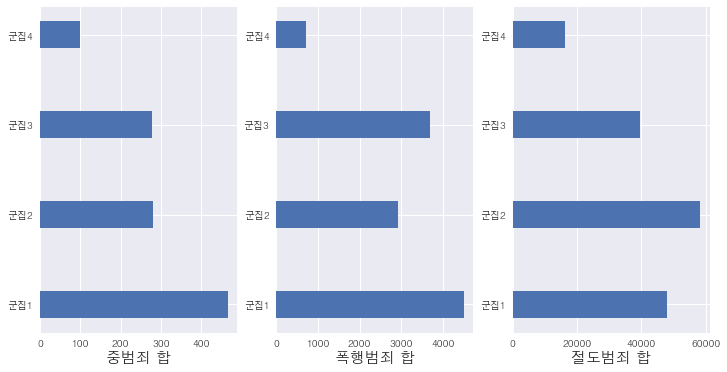

In [40]:
ypos = np.arange(4)
y_pos = ['군집1', '군집2', '군집3', '군집4']
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
fluctuations = [group1_cluster1, group2_cluster1, group3_cluster1, group4_cluster1]
rects = plt.barh(ypos, fluctuations, align='center', height=0.3)
plt.yticks(ypos, y_pos)
plt.xlabel('중범죄 합', fontdict = {'fontsize':15})
plt.subplot(1,3,2)
fluctuations = [group1_cluster2, group2_cluster2, group3_cluster2, group4_cluster2]
rects = plt.barh(ypos, fluctuations, align='center', height=0.3)
plt.yticks(ypos, y_pos)
plt.xlabel('폭행범죄 합', fontdict = {'fontsize':15})
plt.subplot(1,3,3)
fluctuations = [group1_cluster3, group2_cluster3, group3_cluster3, group4_cluster3]
rects = plt.barh(ypos, fluctuations, align='center', height=0.3)
plt.yticks(ypos, y_pos)
plt.xlabel('절도범죄 합', fontdict = {'fontsize':15})
plt.show()

In [41]:
print(crime.iloc[cluster1,]['REG'].value_counts())
print(crime.iloc[cluster2,]['REG'].value_counts())
print(crime.iloc[cluster3,]['REG'].value_counts())
print(crime.iloc[cluster4,]['REG'].value_counts())

3    12
4     2
2     2
1     0
Name: REG, dtype: int64
4    7
2    5
1    5
3    0
Name: REG, dtype: int64
4    4
3    2
2    1
1    1
Name: REG, dtype: int64
2    4
1    3
3    2
4    0
Name: REG, dtype: int64
